# Task 2: Supervised Machine Learning 


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

# Import Packages

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
#warnings.filterwarnings('ignore')

# READING FILE USING PANDAS

In [9]:
 student_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [10]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# USING HEAD WE PRINT HEAD ELEMENT OF THE FILE

In [11]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
student_data.shape         # we have 2 coulmn and 25 rows

(25, 2)

In [17]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
student_data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [34]:
#student_data.describe()       
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
student_data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [23]:
student_data['Hours'].isnull().sum()

0

In [26]:
student_data['Scores'].isnull().sum()

0

# Start with Visualizing the data:

# countplot

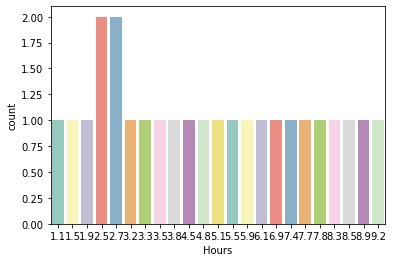

In [48]:
sns.countplot(x='Hours',data=student_data,palette = "Set3")

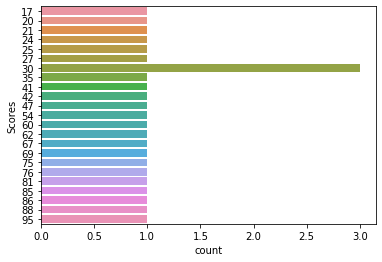

In [49]:
sns.countplot(y='Scores',data=student_data)

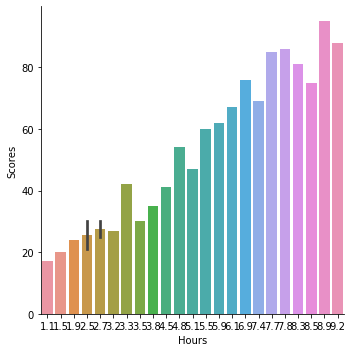

In [52]:

sns.catplot(x="Hours", y='Scores', kind="bar", data=student_data)

# boxplot

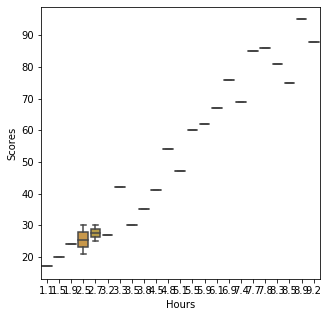

In [60]:

plt.figure(figsize=(5,5))

sns.boxplot(x="Hours",y="Scores", data=student_data)

# scatterplot:

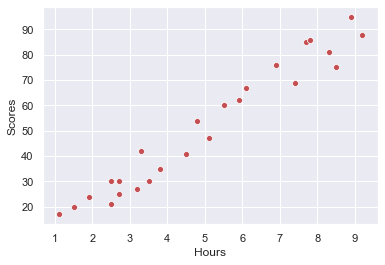

In [70]:
sns.set(style='darkgrid')
sns.scatterplot(x='Hours',y='Scores',data=student_data,color='r')

# pairplot:

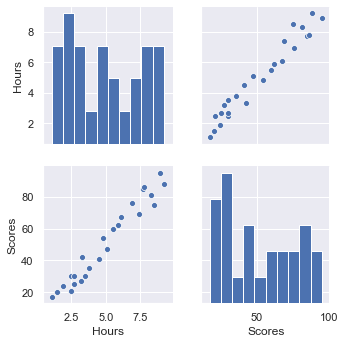

In [72]:
sns.set(style='darkgrid')
sns.pairplot(student_data)

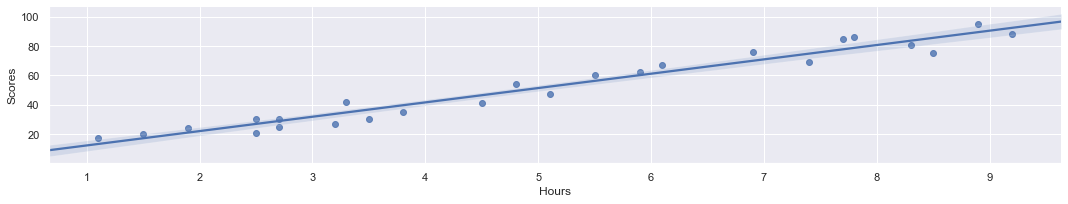

In [80]:
sns.lmplot(x="Hours",y="Scores",height=3,aspect=5,data=student_data)

# Dividing the Data between label and attributes

In [81]:
x=student_data.iloc[:, :-1].values
y=student_data.iloc[:, 1].values

# Training The Model 

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

# Algorithm-Linear Regression

I have choosen simple Linear Regression algorithm as the dataset only contains two columns: Hours and Scores(which implies that the dataset has one dependent and one independent variable) and its linear(as per the visualizations)

In [84]:
test=LinearRegression()
test.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
line = test.coef_*x+test.intercept_
line


array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

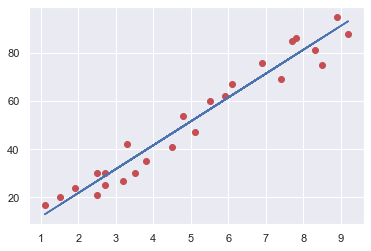

In [89]:

plt.scatter(x, y,color='r')
plt.plot(x, line);
plt.show()

# Making Prediction:

In [91]:
print(x_test) 
y_pred = test.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [140]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


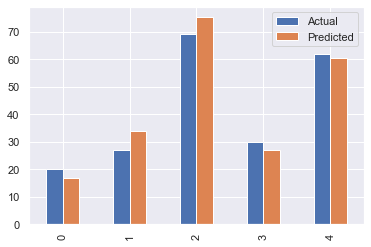

In [93]:

data.plot(kind='bar',label='Actual')

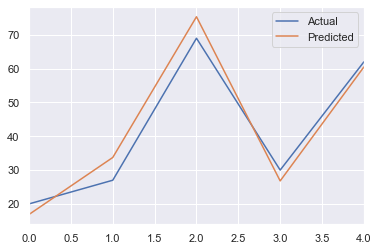

In [94]:
data.plot(kind='line',label='Actual')
plt.legend()

# Checking the accuracy of algorithm

In [102]:
#from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

# Predicting score for 9.25 hours

In [148]:
Hours = np.array([9.25])
Hours = Hours.reshape(-1,1)
own_pred = test.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model:

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error=",MAE)
print("Root Mean Square Error=",RMSE)

Mean Absolute Error= 4.183859899002975
Root Mean Square Error= 4.6474476121003665


# Thank you